In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
from datetime import datetime, timedelta
import statsmodels.api as sm
import math
import seaborn as sn

# Step 1: Pull stock data of 10 different stocks and calculate the daily returns

In [2]:
# Risk-free rate (annual)
risk_free_rate = 0.01  # 1%

# Number of trading days in a year
trading_days = 252

# Function to download stock data
def download_stock_data(tickers, start_date, end_date):
    data =  yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Function to calculate daily returns
def calculate_daily_returns(df):
    return df.pct_change().dropna()

tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META', 'XOM','BRK-B', 'ING', 'WMT', 'AMAT', 'MRVL', 'TGT', 'COST', 'HD', 'LOW', 'TJX', 'M', 'KR', 'DG', 'DLTR', 'BBY']


#tickers = ["DPZ", "AAPL", "GOOG", "ING", "GME","NFLX", "BA", "WMT","GS","XOM","NKE", "META","BRK-B", "MSFT", 'NVDA', 'ING']

# tickers = [
#     "ING", "TCB",
#     "BMA", "PB",
#     "FCF", "PFS",
#     "BOH",
#     "BK", "CMA", "PNC",
#     "KB", "SHG",
#     "BSAC", "CIB",
#     "BBD", "BSBR"
# ]

start_date= datetime(year=2017,month=12,day=31) # last trading day of 2017
end_date= datetime(year=2024,month=9,day=24)

# Download the daily adjusted closing prices for the selected stocks
stock_data = download_stock_data(tickers, start_date, end_date)

returns = calculate_daily_returns(stock_data)

market_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Ensure indices are datetime
stock_data.index = pd.to_datetime(stock_data.index)
market_data.index = pd.to_datetime(market_data.index)

# Reindex stock_data and market_data to common dates
common_dates = stock_data.index.union(market_data.index)

stock_data = stock_data.reindex(common_dates).ffill()
market_data = market_data.reindex(common_dates).ffill()

[*********************100%%**********************]  23 of 23 completed
[*********************100%%**********************]  1 of 1 completed


# Step 2: Find correlations between the daily returns of all the stocks and pull out pairs whose correlations >= 0.9

In [3]:
corr_matrix = returns.corr()
corr_matrix

Ticker,AAPL,AMAT,AMZN,BBY,BRK-B,COST,DG,DLTR,GOOG,HD,...,M,META,MRVL,MSFT,NVDA,TGT,TJX,TSLA,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.590167,0.604569,0.454719,0.547738,0.533771,0.249500,0.256285,0.652086,0.543305,...,0.269220,0.541498,0.533510,0.732588,0.599241,0.351291,0.428609,0.459280,0.342071,0.309008
AMAT,0.590167,1.000000,0.512096,0.435393,0.511756,0.468319,0.235460,0.272847,0.570365,0.527908,...,0.312850,0.475452,0.692943,0.634426,0.694553,0.348364,0.429759,0.432482,0.261970,0.350600
AMZN,0.604569,0.512096,1.000000,0.361672,0.385964,0.495254,0.227877,0.243120,0.663410,0.448726,...,0.216608,0.605093,0.540602,0.694903,0.591356,0.341107,0.323264,0.414361,0.296126,0.177086
BBY,0.454719,0.435393,0.361672,1.000000,0.475255,0.405908,0.227605,0.283449,0.374364,0.593717,...,0.439325,0.324720,0.409312,0.428701,0.410629,0.486473,0.468163,0.295231,0.309569,0.340954
BRK-B,0.547738,0.511756,0.385964,0.475255,1.000000,0.454356,0.281085,0.334050,0.520319,0.591288,...,0.423147,0.375267,0.400141,0.559137,0.407671,0.393730,0.548667,0.268493,0.394041,0.584039
COST,0.533771,0.468319,0.495254,0.405908,0.454356,1.000000,0.412216,0.332407,0.478679,0.545679,...,0.232296,0.386331,0.436037,0.573635,0.466738,0.473422,0.388104,0.310226,0.583780,0.212324
DG,0.249500,0.235460,0.227877,0.227605,0.281085,0.412216,1.000000,0.516618,0.217335,0.394253,...,0.215321,0.172694,0.201683,0.284319,0.226027,0.458987,0.283301,0.160195,0.402871,0.131553
DLTR,0.256285,0.272847,0.243120,0.283449,0.334050,0.332407,0.516618,1.000000,0.242820,0.390740,...,0.294347,0.198267,0.246168,0.281083,0.214632,0.396174,0.339940,0.185490,0.317239,0.242577
GOOG,0.652086,0.570365,0.663410,0.374364,0.520319,0.478679,0.217335,0.242820,1.000000,0.494838,...,0.259354,0.636996,0.516878,0.752505,0.596981,0.321078,0.422761,0.380562,0.291292,0.299179


In [4]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1,len(corr_matrix.columns)):
        if corr_matrix.iloc[i,j] >= 0.6:
            pair = (corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_corr_pairs.append(pair)
high_corr_pairs

[('AAPL', 'AMZN', 0.6045693903816292),
 ('AAPL', 'GOOG', 0.6520858319808245),
 ('AAPL', 'MSFT', 0.7325879148723365),
 ('AMAT', 'MRVL', 0.692942839863931),
 ('AMAT', 'MSFT', 0.6344257746567347),
 ('AMAT', 'NVDA', 0.6945531870182771),
 ('AMZN', 'GOOG', 0.66341032632326),
 ('AMZN', 'META', 0.6050933231205159),
 ('AMZN', 'MSFT', 0.694903318388468),
 ('GOOG', 'META', 0.6369963428724823),
 ('GOOG', 'MSFT', 0.7525052205325006),
 ('HD', 'LOW', 0.8297244613001477),
 ('META', 'MSFT', 0.604434315845414),
 ('MRVL', 'NVDA', 0.6860269745457084),
 ('MSFT', 'NVDA', 0.6702072584922706)]

# Step 3: Now that we have found pairs that are highly correlated, we should run cointegration test and adf test to check for stationarity of the spread and to test for mean reversion,

In [5]:
from statsmodels.tsa.stattools import adfuller, coint

p_values = []
spreads = []
i = 0
for t1, t2, corr in high_corr_pairs:
    log_a = np.log(stock_data[t1])
    log_b = np.log(stock_data[t2])

    # Add constant to log_b to perform linear regression
    log_b_with_const = sm.add_constant(log_b)

    # Perform the linear regression
    model = sm.OLS(log_a, log_b_with_const)
    result = model.fit()

    hedge_ratio = result.params[1]

    spread = log_a - hedge_ratio * log_b
    spreads.append(spread)

    adf_test = adfuller(spread)
    if adf_test[1] <= 0.08:
        p_values.append((adf_test[1], t1, t2, i))
    i += 1

In [6]:
p_values

[(0.05122121403559725, 'AMAT', 'MRVL', 3),
 (0.026677818517140805, 'AMAT', 'MSFT', 4),
 (0.010519413971210216, 'AMZN', 'META', 7),
 (0.07658447723277573, 'GOOG', 'MSFT', 10),
 (0.010532882588212701, 'HD', 'LOW', 11)]

In [7]:
p_values_from_coint = []
for p, s1, s2, ind in p_values:
    val = coint(stock_data[s1], stock_data[s2])
    if val[1] <= 0.08:
        p_values_from_coint.append((val[1], s1, s2, ind))
p_values_from_coint

[(0.03233879272526275, 'AMAT', 'MSFT', 4),
 (0.05379969480329995, 'HD', 'LOW', 11)]

In [8]:
z_scores = []
for item in p_values_from_coint:
    ind = item[3]
    spread = spreads[ind]
    mean_spread = spread.mean()
    std_spread = spread.std()
    z_score = (spread - mean_spread) / std_spread
    z_scores.append(z_score)
z_scores

[Date
 2018-01-02    2.645421
 2018-01-03    2.712035
 2018-01-04    2.691624
 2018-01-05    2.650354
 2018-01-08    2.771706
                 ...   
 2024-09-17   -0.034739
 2024-09-18   -0.046160
 2024-09-19    0.142784
 2024-09-20    0.063577
 2024-09-23    0.138995
 Length: 1692, dtype: float64,
 Date
 2018-01-02    0.088640
 2018-01-03    0.127350
 2018-01-04    0.170240
 2018-01-05    0.075368
 2018-01-08    0.179305
                 ...   
 2024-09-17    0.895622
 2024-09-18    0.938290
 2024-09-19    1.016587
 2024-09-20    1.038376
 2024-09-23    1.027513
 Length: 1692, dtype: float64]

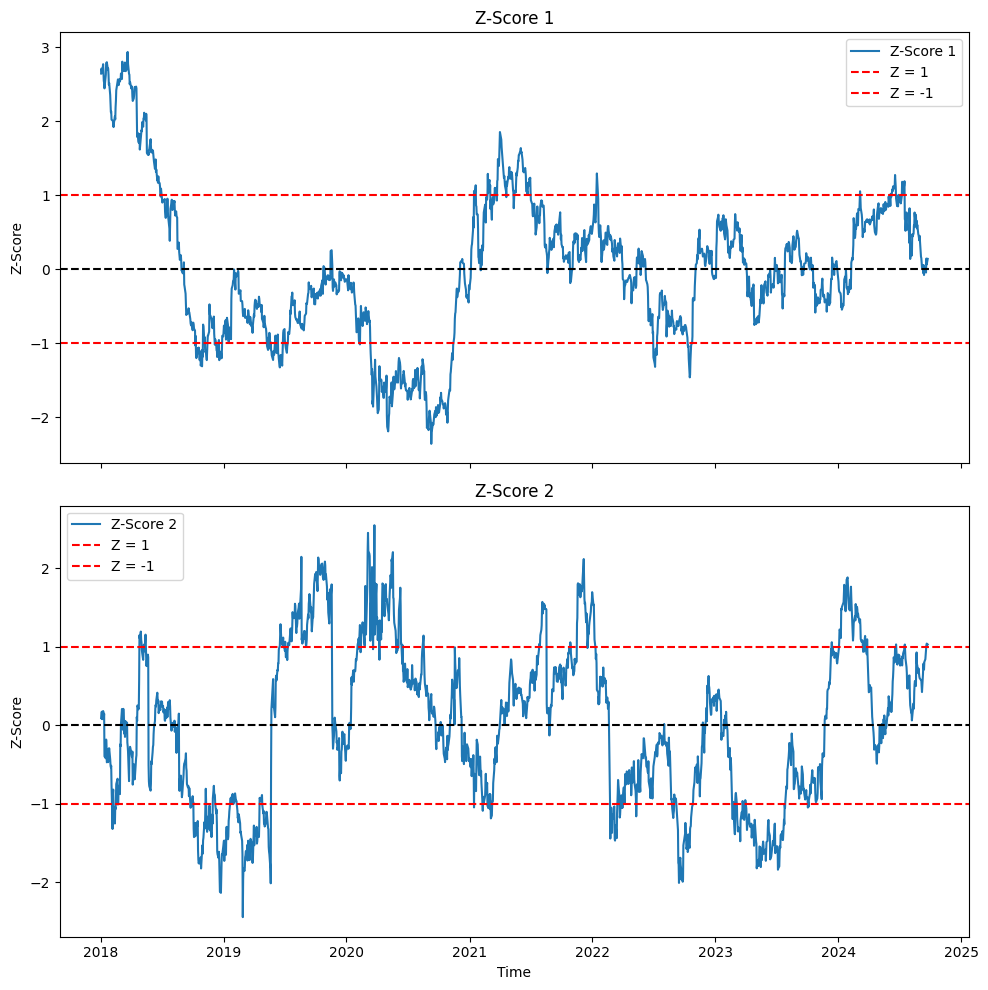

In [9]:
# Number of subplots
num_plots = len(z_scores)

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots), sharex=True)

# Plot each Z-score
for i, z_score in enumerate(z_scores):
    if num_plots > 1:
        ax = axes[i]  # Get the i-th subplot axis
    else:
        ax = axes  # If there's only one plot, axes is not a list
    
    ax.plot(z_score, label=f'Z-Score {i+1}')
    ax.axhline(0, color='black', linestyle='--')  # Optional: add a line at Z=0 for reference
    ax.axhline(1, color='red', linestyle='--', label='Z = 1')
    ax.axhline(-1, color='red', linestyle='--', label='Z = -1')
    ax.set_title(f'Z-Score {i+1}')
    ax.set_ylabel('Z-Score')
    ax.legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()

In [20]:
# # Define parameters
# entry_threshold = 1
# exit_threshold = 0.1
# initial_capital = 3000
# i = 0

# # Loop through each pair's Z-scores
# for z in z_scores:
#     pair_name = (p_values_from_coint[i][1], p_values_from_coint[i][2])
#     cash = initial_capital
#     positions = []
#     portfolio_values = []

#     # Extract the stock names from the pair name
#     stock_a, stock_b = pair_name[0], pair_name[1]
#     print("stock A:", stock_a)
#     print("stock B:", stock_b)
    
#     in_position = False  # Tracks if we are currently in a trade

#     for date, z_score in z.items():
#         price_a = stock_data[stock_a].loc[date]
#         price_b = stock_data[stock_b].loc[date]

#         if z_score < -entry_threshold and not in_position:
#             # Go LONG: buy stock A and short stock B
#             capital_per_stock = cash / 2
#             stock_a_shares = capital_per_stock / price_a      # Positive shares (long)
#             stock_b_shares = - (capital_per_stock / price_b)  # Negative shares (short)

#             # Adjust cash
#             cash -= stock_a_shares * price_a  # Cost of buying stock A
#             cash += -stock_b_shares * price_b  # Proceeds from shorting stock B

#             positions.append(('long', date, stock_a_shares, stock_b_shares, price_a, price_b))
#             in_position = True

#         elif z_score > entry_threshold and not in_position:
#             # Go SHORT: short stock A and buy stock B
#             capital_per_stock = cash / 2
#             stock_a_shares = - (capital_per_stock / price_a)  # Negative shares (short)
#             stock_b_shares = capital_per_stock / price_b      # Positive shares (long)

#             # Adjust cash
#             cash += -stock_a_shares * price_a  # Proceeds from shorting stock A
#             cash -= stock_b_shares * price_b   # Cost of buying stock B

#             positions.append(('short', date, stock_a_shares, stock_b_shares, price_a, price_b))
#             in_position = True

#         elif abs(z_score) < exit_threshold and in_position:
#             # Close the position
#             entry = positions[-1]
#             entry_type, entry_date, stock_a_shares, stock_b_shares, entry_price_a, entry_price_b = entry

#             # Calculate profit/loss
#             profit_a = stock_a_shares * (price_a - entry_price_a)
#             profit_b = stock_b_shares * (price_b - entry_price_b)
#             total_profit = profit_a + profit_b

#             # Adjust cash
#             cash += (stock_a_shares * price_a) + (stock_b_shares * price_b)

#             # Close position
#             in_position = False

#         # Calculate portfolio value
#         if in_position:
#             portfolio_value = cash + (stock_a_shares * price_a) + (stock_b_shares * price_b)
#         else:
#             portfolio_value = cash

#         portfolio_values.append(portfolio_value)

#     final_portfolio_value = portfolio_values[-1]
#     total_return = (final_portfolio_value - initial_capital) / initial_capital
#     print(f'Pair: {stock_a} - {stock_b}')
#     print(f'Final Portfolio Value: ${final_portfolio_value:.2f}')
#     print(f'Total Return: {total_return:.2%}\n')
#     print(f'Positions: {positions}\n')
#     i += 1
# Define thresholds
entry_threshold = 1
exit_threshold = 0.1
initial_capital = 3000
stop_loss_threshold = 0.05  # 5% loss
take_profit_threshold = 0.1  # 10% profit
i = 0

# Loop through each pair's Z-scores
for z in z_scores:
    pair_name = (p_values_from_coint[i][1], p_values_from_coint[i][2])
    cash = initial_capital
    positions = []
    portfolio_values = []
    stock_a, stock_b = pair_name[0], pair_name[1]
    in_position = False

    for date, z_score in z.items():  # Updated this line
        price_a = stock_data[stock_a].loc[date]
        price_b = stock_data[stock_b].loc[date]

        if z_score < -entry_threshold and not in_position:
            # Go LONG: buy stock A and short stock B
            capital_per_stock = cash / 2
            stock_a_shares = capital_per_stock / price_a
            stock_b_shares = - (capital_per_stock / price_b)
            cash -= stock_a_shares * price_a
            cash += -stock_b_shares * price_b
            entry_price_a = price_a
            entry_price_b = price_b
            entry_type = 'long'
            initial_position_value = (abs(stock_a_shares) * entry_price_a) + (abs(stock_b_shares) * entry_price_b)
            positions.append(('long', date, stock_a_shares, stock_b_shares, price_a, price_b))
            in_position = True

        elif z_score > entry_threshold and not in_position:
            # Go SHORT: short stock A and buy stock B
            capital_per_stock = cash / 2
            stock_a_shares = - (capital_per_stock / price_a)
            stock_b_shares = capital_per_stock / price_b
            cash += -stock_a_shares * price_a
            cash -= stock_b_shares * price_b
            entry_price_a = price_a
            entry_price_b = price_b
            entry_type = 'short'
            initial_position_value = (abs(stock_a_shares) * entry_price_a) + (abs(stock_b_shares) * entry_price_b)
            positions.append(('short', date, stock_a_shares, stock_b_shares, price_a, price_b))
            in_position = True

        elif in_position:
            # Calculate current profit/loss
            profit_a = stock_a_shares * (price_a - entry_price_a)
            profit_b = stock_b_shares * (price_b - entry_price_b)
            total_profit = profit_a + profit_b
            profit_percentage = total_profit / initial_position_value

            if profit_percentage <= -stop_loss_threshold or profit_percentage >= take_profit_threshold:
                # Close the position due to stop loss or take profit
                cash += (stock_a_shares * price_a) + (stock_b_shares * price_b)
                in_position = False
                positions.append(('exit', date, stock_a_shares, stock_b_shares, price_a, price_b))
                print(f"Closed position at {date} due to {'stop loss' if profit_percentage <= -stop_loss_threshold else 'take profit'} at {profit_percentage*100:.2f}%")
                stock_a_shares = 0
                stock_b_shares = 0
                continue

            elif abs(z_score) < exit_threshold:
                # Close the position based on Z-score exit threshold
                cash += (stock_a_shares * price_a) + (stock_b_shares * price_b)
                in_position = False
                positions.append(('exit', date, stock_a_shares, stock_b_shares, price_a, price_b))
                print(f"Closed position at {date} due to Z-score exit threshold")
                stock_a_shares = 0
                stock_b_shares = 0
                continue

        # Calculate portfolio value
        if in_position:
            portfolio_value = cash + (stock_a_shares * price_a) + (stock_b_shares * price_b)
        else:
            portfolio_value = cash

        portfolio_values.append(portfolio_value)

    final_portfolio_value = portfolio_values[-1]
    total_return = (final_portfolio_value - initial_capital) / initial_capital
    print(f'Pair: {stock_a} - {stock_b}')
    print(f'Final Portfolio Value: ${final_portfolio_value:.2f}')
    print(f'Total Return: {total_return:.2%}\n')
    print(f'Positions: {positions}\n')
    i += 1


Closed position at 2018-05-21 00:00:00 due to take profit at 10.07%
Closed position at 2018-07-25 00:00:00 due to take profit at 10.92%
Closed position at 2019-02-01 00:00:00 due to Z-score exit threshold
Closed position at 2019-10-21 00:00:00 due to take profit at 10.30%
Closed position at 2020-03-18 00:00:00 due to stop loss at -6.07%
Closed position at 2020-08-14 00:00:00 due to take profit at 11.07%
Closed position at 2020-08-27 00:00:00 due to stop loss at -7.52%
Closed position at 2020-11-13 00:00:00 due to take profit at 10.43%
Closed position at 2021-01-29 00:00:00 due to Z-score exit threshold
Closed position at 2021-03-31 00:00:00 due to stop loss at -7.09%
Closed position at 2021-07-07 00:00:00 due to take profit at 10.15%
Closed position at 2022-01-28 00:00:00 due to Z-score exit threshold
Closed position at 2022-11-03 00:00:00 due to Z-score exit threshold
Closed position at 2024-09-05 00:00:00 due to Z-score exit threshold
Pair: AMAT - MSFT
Final Portfolio Value: $6695.78

In [105]:
# Define initial parameters
initial_capital = 3000
entry_thresholds = [1, 1.5, 2]  # Different entry thresholds to test
exit_thresholds = [0.1, 0.25, 0.5]  # Different exit thresholds to test

# Store results for analysis
results = []

# Outer loop for varying the entry and exit thresholds
for entry_threshold in entry_thresholds:
    for exit_threshold in exit_thresholds:
        i = 0
        print(f"Testing with entry threshold: {entry_threshold} and exit threshold: {exit_threshold}\n")
        for z in z_scores:
            cash = initial_capital
            positions = []
            portfolio_values = []
            dates = []

            in_position = False  # Tracks if we are currently in a trade

            for date, z_score_value in z.iteritems():
                price_a = stock_data[stock_a].loc[date]
                price_b = stock_data[stock_b].loc[date]

                if z_score_value < -entry_threshold and not in_position:
                    # Go LONG: buy stock A and short stock B
                    capital_per_stock = cash / 2
                    stock_a_shares = capital_per_stock / price_a      # Positive shares (long)
                    stock_b_shares = - (capital_per_stock / price_b)  # Negative shares (short)

                    # Adjust cash
                    cash -= stock_a_shares * price_a  # Cost of buying stock A
                    cash += -stock_b_shares * price_b  # Proceeds from shorting stock B

                    positions.append(('long', date, stock_a_shares, stock_b_shares, price_a, price_b))
                    in_position = True

                elif z_score_value > entry_threshold and not in_position:
                    # Go SHORT: short stock A and buy stock B
                    capital_per_stock = cash / 2
                    stock_a_shares = - (capital_per_stock / price_a)  # Negative shares (short)
                    stock_b_shares = capital_per_stock / price_b      # Positive shares (long)

                    # Adjust cash
                    cash += -stock_a_shares * price_a  # Proceeds from shorting stock A
                    cash -= stock_b_shares * price_b   # Cost of buying stock B

                    positions.append(('short', date, stock_a_shares, stock_b_shares, price_a, price_b))
                    in_position = True

                elif abs(z_score_value) < exit_threshold and in_position:
                    # Close the position
                    # Adjust cash
                    cash += stock_a_shares * price_a + stock_b_shares * price_b

                    # Close position
                    in_position = False

                # Calculate portfolio value
                if in_position:
                    portfolio_value = cash + stock_a_shares * price_a + stock_b_shares * price_b
                else:
                    portfolio_value = cash

                portfolio_values.append(portfolio_value)
                dates.append(date)

            # If still in position at the end, close the position
            if in_position:
                # Close the position at the last available date
                last_date = stock_data.index[-1]
                price_a = stock_data[stock_a].iloc[-1]
                price_b = stock_data[stock_b].iloc[-1]

                # Adjust cash
                cash += stock_a_shares * price_a + stock_b_shares * price_b
                portfolio_value = cash
                portfolio_values.append(portfolio_value)
                dates.append(last_date)

                in_position = False

            # Create a DataFrame for portfolio values
            portfolio_df = pd.DataFrame({
                'Date': dates,
                'Portfolio_Value': portfolio_values
            })
            portfolio_df.set_index('Date', inplace=True)

            # Calculate daily portfolio returns
            portfolio_df['Returns'] = portfolio_df['Portfolio_Value'].pct_change().fillna(0)

            # Calculate market returns
            market_returns = market_data.pct_change().fillna(0)

            # Align market returns with portfolio dates
            aligned_market_returns = market_returns.loc[portfolio_df.index].fillna(0)

            # Annualized portfolio return and standard deviation
            mean_daily_return = portfolio_df['Returns'].mean()
            std_daily_return = portfolio_df['Returns'].std()

            annualized_return = (1 + mean_daily_return) ** trading_days - 1
            annualized_std = std_daily_return * np.sqrt(trading_days)

            # Calculate Sharpe Ratio
            sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std

            # Calculate beta
            covariance = portfolio_df['Returns'].cov(aligned_market_returns)
            market_variance = aligned_market_returns.var()
            beta = covariance / market_variance

            final_portfolio_value = portfolio_values[-1]
            total_return = (final_portfolio_value - initial_capital) / initial_capital
            print(f'\nPair: {stock_a} - {stock_b}')
            print(f'Final Portfolio Value: ${final_portfolio_value:.2f}')
            print(f'Total Return: {total_return:.2%}')
            print(f'Sharpe Ratio: {sharpe_ratio:.4f}')
            print(f'Beta: {beta:.4f}\n')
            print(f'Positions: {positions}\n')
            i += 1

# Analyze results
print("\nSummary of Results:")
for res in results:
    print(f"Pair: {res['pair']}, Entry Threshold: {res['entry_threshold']}, Exit Threshold: {res['exit_threshold']}, Total Return: {res['total_return']:.2%}")


Testing with entry threshold: 1 and exit threshold: 0.1


Pair: HD - LOW
Final Portfolio Value: $3296.83
Total Return: 9.89%
Sharpe Ratio: 0.0932
Beta: -0.0119

Positions: [('short', Timestamp('2018-01-02 00:00:00'), -9.40340906101646, 18.523691695025008, 159.51661682128906, 80.97737884521484), ('long', Timestamp('2018-10-09 00:00:00'), 9.383266168500372, -16.19664915015424, 168.80889892578125, 97.79669952392578), ('long', Timestamp('2019-05-10 00:00:00'), 9.542709795586502, -16.748219513117434, 170.06068420410156, 96.89625549316406), ('long', Timestamp('2020-02-10 00:00:00'), 8.202002263062962, -15.733725911493513, 214.42124938964844, 111.77794647216797), ('short', Timestamp('2021-01-14 00:00:00'), -6.719539237395313, 10.3317786420656, 244.77487182617188, 159.19566345214844), ('short', Timestamp('2021-02-23 00:00:00'), -6.657539715997418, 10.267250102308012, 243.77145385742188, 158.0674591064453), ('short', Timestamp('2022-01-13 00:00:00'), -4.49803753015502, 6.822657838440228, 360.37